# Práctica 2. Funciones básicas de OpenCV

Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1

In [2]:
# Read image from file
img = cv2.imread('mandril.jpg') 

# Convert image to grayscale
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gris, 250, 100)

### Tarea 1.1 

Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). 

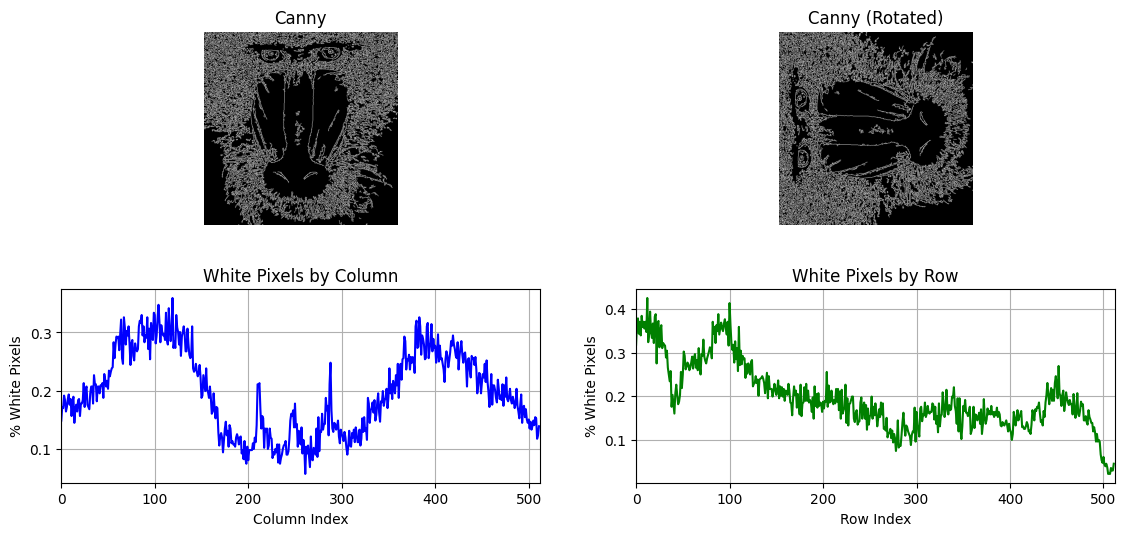

In [5]:
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = np.transpose(cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)) 

# Normalize by the number of rows and the maximum pixel value (255)
col_percentages = col_counts[0] / (255 * canny.shape[0]) # % of white pixels per column
row_percentages = row_counts[0] / (255 * canny.shape[1]) # % of white pixels per row

# Plot the results
plt.figure(figsize=(12, 6))

# Original Canny image
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

# Rotated Canny image for better visualization
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Canny (Rotated)")
plt.imshow(np.rot90(canny), cmap='gray')

# Column-wise white pixel percentage
plt.subplot(2, 2, 3)
plt.title("White Pixels by Column")
plt.xlabel("Column Index")
plt.ylabel("% White Pixels")
plt.plot(col_percentages, color='blue')
plt.grid(True)

# Row-wise white pixel percentage
plt.subplot(2, 2, 4)
plt.title("White Pixels by Row")
plt.xlabel("Row Index")
plt.ylabel("% White Pixels")
plt.plot(row_percentages, color='green')
plt.grid(True)

# Set x-axis range for both plots
plt.subplot(2, 2, 3).set_xlim([0, canny.shape[1]])
plt.subplot(2, 2, 4).set_xlim([0, canny.shape[0]])

plt.tight_layout(pad=3.0)
plt.show()

Determina el valor máximo de píxeles blancos para filas, `maxfil`, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Maximum white pixels in a row: 218
Number of rows with white pixels >= 0.95 * maxfil: 2
Positions of these rows: [ 12 100]
Maximum white pixels in a column: 184
Number of columns with white pixels >= 0.95 * maxcol: 3
Positions of these columns: [104 115 119]


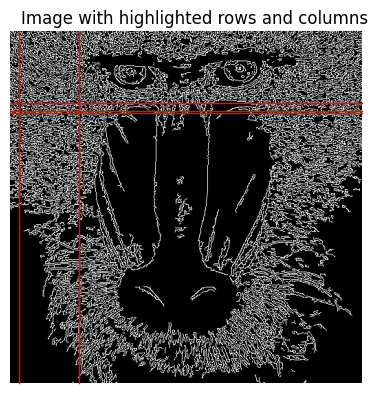

In [8]:
img = cv2.imread('mandril.jpg') 
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(grayscale, 250, 100)

# Calculate the number of white pixels
row_counts = np.sum(canny == 255, axis=1)
col_counts = np.sum(canny == 255, axis=0)

# Determine the maximum number of white pixels in any row
maxfil = np.max(row_counts)
maxcol = np.max(col_counts)

# Find rows with white pixel count greater than or equal to 0.95 * maxfil
threshold_x = 0.95 * maxfil
rows_above_threshold = np.where(row_counts >= threshold_x)[0]

# Find columns with white pixel count greater than or equal to 0.95 * maxcol
threshold_y = 0.95 * maxcol
cols_above_threshold = np.where(col_counts >= threshold_y)[0]

# Print the results
print(f"Maximum white pixels in a row: {maxfil}")
print(f"Number of rows with white pixels >= 0.95 * maxfil: {len(rows_above_threshold)}")
print(f"Positions of these rows: {rows_above_threshold}")

print(f"Maximum white pixels in a column: {maxcol}")
print(f"Number of columns with white pixels >= 0.95 * maxcol: {len(cols_above_threshold)}")
print(f"Positions of these columns: {cols_above_threshold}")

# Plot the image with the highlighted rows and columns
plt.figure()
plt.axis("off")
plt.title("Image with highlighted rows and columns")
plt.imshow(canny, cmap='gray')

for i in rows_above_threshold:
    plt.plot([i, i], [0, canny.shape[1]], 'r', linewidth=1)

for i in cols_above_threshold: 
    plt.plot([0, canny.shape[0]], [i, i], 'r', linewidth=1)

## TAREA 2 

Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

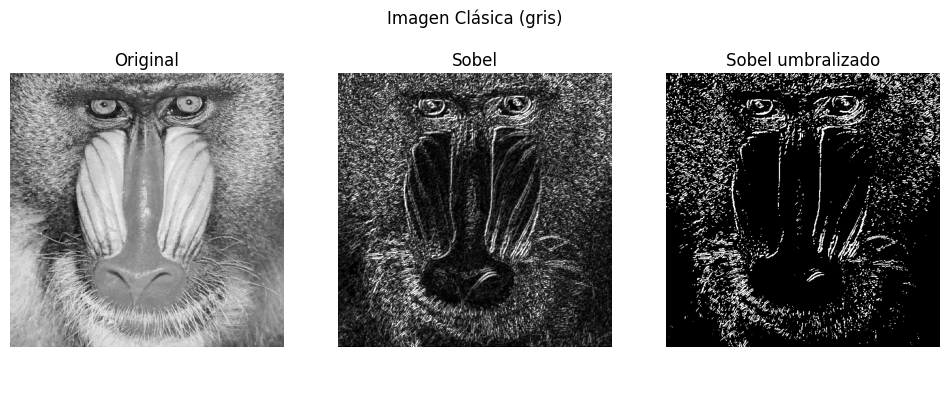

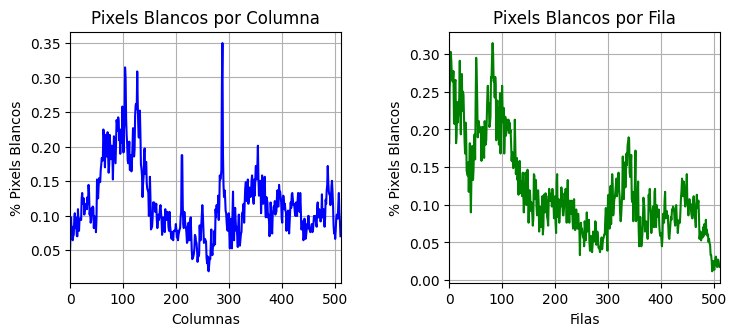

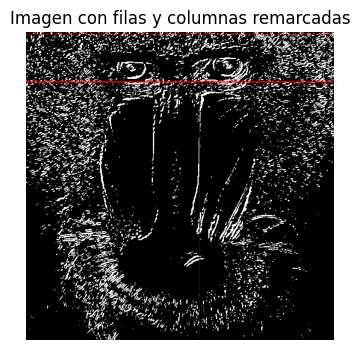

In [4]:
#Para poder ejecutar el código, unicamente ejecutando este bloque, vamos a incorporar elementos de los anteriores bloques
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is None:
    print('Imagen no encontrada')

#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)

# Realizamos un umbralizado a la imagen
_, sobel8Umbralizado = cv2.threshold(sobel8, 130, 255, cv2.THRESH_BINARY)

#Muestra un primer resultado, con la comparación de la imagen original, la que tiene aplicada el sobel y la que además tiene el umbralizado.
plt.figure(figsize=(12, 4))
plt.title("Imagen Clásica (gris)")
plt.axis("off")
plt.subplots_adjust(top=1)#Añadimos un espacio extra entre el título y los subplots

plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Original')
plt.imshow(gris, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Sobel')
plt.imshow(sobel8, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Sobel umbralizado')
plt.imshow(sobel8Umbralizado, cmap='gray')

plt.show()

col_counts = cv2.reduce(sobel8Umbralizado, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
fil_counts = cv2.reduce(sobel8Umbralizado, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
fil_counts = fil_counts.flatten() #El resultado es una matriz de [num filas][1] y no intera tenerlo como un array undimensional, por así decirlo no tener un segunda array con solo el valor de la suma

cols = col_counts[0] / (255 * sobel8Umbralizado.shape[0])
filas = fil_counts / (255 * sobel8Umbralizado.shape[1])


#Dibujamos los gráficos que muestra el % de pixels blancos, tanto por columnas como por filas
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Pixels Blancos por Columna")
plt.xlabel("Columnas")
plt.ylabel("% Pixels Blancos")
plt.plot(cols, color='blue')
plt.xlim([0, sobel8Umbralizado.shape[1]])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Pixels Blancos por Fila")
plt.xlabel("Filas")
plt.ylabel("% Pixels Blancos")
plt.plot(filas, color='green')
plt.xlim([0, sobel8Umbralizado.shape[0]])
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

#Determinamos el valor de la fila y de la columna con el mayor cantidad de pixels blancos
maxfil = np.max(filas)
maxcol = np.max(cols)

#Ahora marcamos los límites (95%+) a partir de las cuales buscaremos la filas que cumplan dichos requisitos
limiteFila = maxfil * 0.95
limiteColumna = maxcol * 0.95

#Buscamos las filas y columnas cuyo % de pixels blancos es un 95% o mas con respecto a la fila con mayor cantidad de estos.
filasSuperioresAlLimite = np.where(filas >= limiteFila)
columnasSuperioresAlLimite = np.where(cols >= limiteColumna)

# Convertimos la imagen en escala de grises a BGR para poder dibujar en color
#gris_bgr = cv2.cvtColor(gris, cv2.COLOR_GRAY2BGR)
sobel8Umbralizado_bgr = cv2.cvtColor(sobel8Umbralizado, cv2.COLOR_GRAY2BGR)

# Remarcamos las filas que cumplen con el criterio
for fila in filasSuperioresAlLimite[0]:
    cv2.line(sobel8Umbralizado_bgr, (0, fila), (sobel8Umbralizado_bgr.shape[1]-1, fila), (0, 0, 255), 1)

# Remarcamos las columnas que cumplen con el criterio
for columna in columnasSuperioresAlLimite[0]:
    cv2.line(sobel8Umbralizado_bgr, (columna, 0), (columna, sobel8Umbralizado_bgr.shape[0]-1), (255, 0, 0), 1)

# Mostramos la imagen con las filas y columnas remarcadas
plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(sobel8Umbralizado_bgr, cv2.COLOR_BGR2RGB))
plt.title('Imagen con filas y columnas remarcadas')
plt.axis('off')
plt.show()

### ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Tras comparar ambas tareas, podemos concluir que los resultados obtenidos con Canny proporcionan una detección de bordes más precisa y confiable. Observamos que Sobel, en comparación con Canny, muestra un mayor número de filas y columnas superando el umbral del 95% del máximo, lo que indica que está siendo menos preciso y marcando una mayor cantidad de bordes que no debería. Esto significa que Canny es más eficaz al resaltar los bordes significativos de la imagen, mientras que Sobel tiende a detectar más ruido y detalles menos relevantes.

## TAREA 3 

Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura. Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [5]:
import cv2
import numpy as np

# Iniciamos la captura de video desde la cámara web
cap = cv2.VideoCapture(0)

# Verificamos si la cámara se abrió correctamente
if not cap.isOpened():
    print("No se puede abrir la cámara")
    exit()

while True:
    # Capturamos frame por frame
    ret, frame = cap.read()

    # Si el frame se lee correctamente, ret es True
    if not ret:
        print("No se recibió frame (se alcanzó el final del video)")
        break

    # Redimensionamos la imagen para facilitar el procesamiento
    frame = cv2.resize(frame, (640, 480))

    ## Efecto esquina superior derecha: canny
    # Convertimos a escala de grises, para el efecto de la esquina superior derecha (canny)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Aplicamos un desenfoque Gaussiano para reducir el ruido
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Aplicamos el detector de bordes de Canny
    edges = cv2.Canny(blur, 50, 150)
    # Convertimos los bordes a BGR para poder mostrar en color, para poder utilizarlo en hstack (cuando agrupemos los efectos)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    
    ##Efecto esquina inferior derecha: detector de contraste
    # Buscamos el píxel más brillante y el más oscuro en la imagen original
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)
    #Creamos una copia del frame original, para aplicar el efecto de detección de brillo
    contrastDetector = frame.copy()
    # Marcamos el píxel más oscuro en el frame original
    cv2.circle(contrastDetector, min_loc, 10, (255, 0, 0), 2)  # Círculo azul
    cv2.putText(contrastDetector, 'Oscuro', (min_loc[0] + 10, min_loc[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    # Marcamos el píxel más brillante en el frame original
    cv2.circle(contrastDetector, max_loc, 10, (0, 0, 255), 2)  # Círculo rojo
    cv2.putText(contrastDetector, 'Brillante', (max_loc[0] + 10, max_loc[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    ## Efecto Pop Art
    height, width, _ = frame.shape
    # Creamos una imagen negra del mismo tamaño que el frame
    pop_art = np.zeros_like(frame)
    # Aplicamos diferentes filtros de color en cada cuadrante
    # Cuadrante superior izquierdo - filtro COLORMAP_HSV
    pop_art[0:height//2, 0:width//2] = cv2.applyColorMap(frame[0:height//2, 0:width//2], cv2.COLORMAP_HSV)
    # Cuadrante superior derecho - filtro COLORMAP_OCEAN
    pop_art[0:height//2, width//2:width] = cv2.applyColorMap(frame[0:height//2, width//2:width], cv2.COLORMAP_OCEAN)
    # Cuadrante inferior izquierdo - filtro COLORMAP_PINK
    pop_art[height//2:height, 0:width//2] = cv2.applyColorMap(frame[height//2:height, 0:width//2], cv2.COLORMAP_PINK)
    # Cuadrante inferior derecho - filtro COLORMAP_SPRING
    pop_art[height//2:height, width//2:width] = cv2.applyColorMap(frame[height//2:height, width//2:width], cv2.COLORMAP_SPRING)

    ## Combinamos el frame original y los efectos en una sola ventana
    # Arriba: frame original y detección de bordes
    combined_top = np.hstack((frame, edges_colored))
    # Abajo: efecto Pop Art y detector de contrastes
    combined_bottom = np.hstack((pop_art, contrastDetector))
    # Combinamos arriba y abajo
    combined = np.vstack((combined_top, combined_bottom))

    # Mostramos el resultado en una ventana llamada 'Demostrador OpenCV'
    cv2.imshow('Demostrador OpenCV', combined)

    # Esperamos por la tecla 'Esc' para salir
    if cv2.waitKey(1) == 27:
        break

# Liberamos los recursos y cerramos las ventanas
cap.release()
cv2.destroyAllWindows()

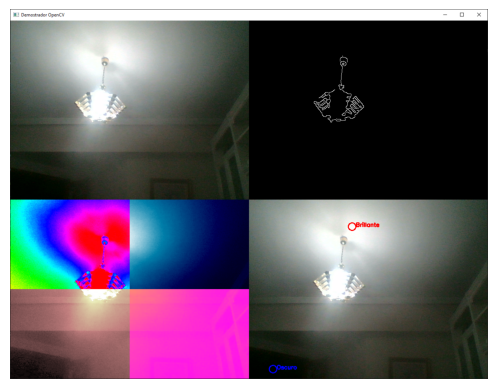

In [1]:
#Cargamos un resultado manualmente (captura de pantalla), para la tarea 3

from PIL import Image
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = Image.open('task3Result.png')

plt.imshow(imagen)
plt.axis('off')
plt.show()

## TAREA 4

Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [7]:
import cv2
import numpy as np

debug_mode = True

# Initialize video capture from the default camera
cap = cv2.VideoCapture(0)

# Create background subtractor for motion detection
background_subtractor = cv2.createBackgroundSubtractorMOG2(history=600, varThreshold=200)

def blend_transparent(background, overlay):
    """
    Overlay 'overlay' image on 'background' image with transparency.

    Parameters:
    - background: The background image.
    - overlay: The image to overlay with alpha channel.

    Returns:
    - Blended image.
    """
    # Split the overlay image into color channels and alpha channel
    overlay_img = overlay[..., :3]  # Color channels
    overlay_mask = overlay[..., 3:]  # Alpha channel

    # Normalize the alpha mask to keep intensity between 0 and 1
    mask = overlay_mask / 255.0

    # Get the region of interest from the background where the overlay will be placed
    background_roi = background[0:overlay.shape[0], 0:overlay.shape[1]]

    # Blend the images using the alpha mask
    blended = background_roi * (1 - mask) + overlay_img * mask

    # Return the blended image
    return blended.astype(np.uint8)

# Load curtain image with alpha channel (transparency)
curtain = cv2.imread('curtain.png', cv2.IMREAD_UNCHANGED)
if curtain is None or curtain.size == 0:
    print('Error: Curtain image not found or is empty.')
    cap.release()
    cv2.destroyAllWindows()
    exit()

# Set fixed size for the curtain
curtain_width = 400
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
curtain_height = frame_height
curtain_resized_fixed = cv2.resize(curtain, (curtain_width, curtain_height))

# Initialize curtain position and animation parameters
curtain_position = 0
target_position = 0
animation_speed = 0.1  # Controls the speed of the curtain movement

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_hist_eq = cv2.equalizeHist(frame_gray)

    # Reduce noise by applying a Gaussian Blur before processing the frame
    blurred_frame = cv2.GaussianBlur(frame_hist_eq, (5, 5), 0)

    # Apply background subtraction to get the foreground mask
    fgmask = background_subtractor.apply(blurred_frame)

    # Tresholding for foreground segmentation: manual thresholding to improve motion detection
    _, fgmask_thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to reduce noise in the foreground mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fgmask_clean = cv2.morphologyEx(fgmask_thresh, cv2.MORPH_OPEN, kernel)

    # Find contours in the clean foreground mask
    contours, _ = cv2.findContours(fgmask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour, assuming it's the main moving object
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Update target position based on detected motion
        target_position = x

        if debug_mode:
            # Draw bounding rectangle around the largest contour
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate the center of the contour
    contour_center = x + w // 2

    # Calculate the desired curtain position (centered over the contour)
    target_position = contour_center - curtain_width // 2

    # Smoothly animate curtain position towards the target position
    curtain_position += (target_position - curtain_position) * animation_speed

    # Calculate curtain placement
    x_start = int(curtain_position)
    y_start = 0

    # Ensure the curtain does not go beyond the frame boundaries
    x_start = max(0, min(x_start, frame.shape[1] - curtain_width))
    x_end = min(x_start + curtain_width, frame.shape[1])
    curtain_width_actual = x_end - x_start

    # Adjust the curtain image if necessary
    curtain_resized = curtain_resized_fixed[:, :curtain_width_actual]

    # Blend the curtain onto the frame
    try:
        frame[y_start:y_start+curtain_resized.shape[0], x_start:x_end] = blend_transparent(
            frame[y_start:y_start+curtain_resized.shape[0], x_start:x_end], curtain_resized
        )
    except ValueError:
        # Skip blending if dimensions do not match
        pass

    # Apply mirror effect to the frame
    mirrored_frame = cv2.flip(frame, 1)

    # Display the resulting frame
    cv2.imshow('Animated Digital Curtain', mirrored_frame)

    if debug_mode:
        # Display the foreground mask
        cv2.imshow('Foreground Mask', fgmask)

        # Display the cleaned foreground mask after morphological operations
        cv2.imshow('Cleaned Foreground Mask', fgmask_clean)

        # Create a copy of the frame to draw contours
        contours_frame = frame.copy()
        cv2.drawContours(contours_frame, contours, -1, (0, 0, 255), 2)
        cv2.imshow('Contours', contours_frame)

    # Keyboard controls
    key = cv2.waitKey(20)
    if key == 27:  # ESC key to exit
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()
